Davies-Bouldin Index: 0.8052437830269734
Silhouette Score: 0.39004223332536625


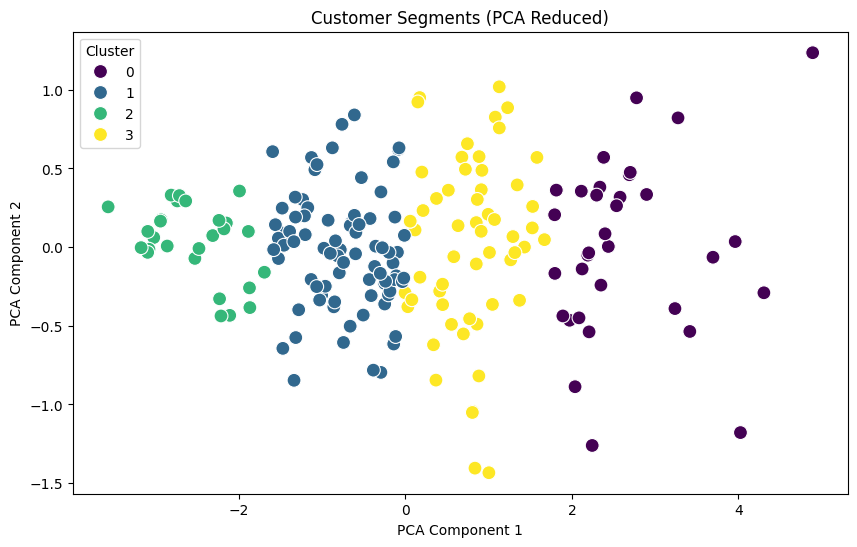

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets and aggregate transaction data
transactions_agg = transactions.groupby("CustomerID").agg(
    TotalSpending=("TotalValue", "sum"),
    TotalQuantity=("Quantity", "sum"),
    TransactionCount=("TransactionID", "count")
).reset_index()

customer_data = customers.merge(transactions_agg, on="CustomerID", how="left").fillna(0)

# Prepare features for clustering
features = customer_data[["TotalSpending", "TotalQuantity", "TransactionCount"]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(features_scaled)

# Calculate clustering metrics
db_index = davies_bouldin_score(features_scaled, customer_data["Cluster"])
silhouette_avg = silhouette_score(features_scaled, customer_data["Cluster"])

# Print clustering metrics
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)
customer_data["PCA1"] = pca_features[:, 0]
customer_data["PCA2"] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=100)
plt.title("Customer Segments (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Save clustering results
customer_data.to_csv("Shreya_Naik_Clustering.csv", index=False)

# Explanation:
# 1. Aggregated transaction data is combined with customer profile data to create features.
# 2. The features are scaled to ensure uniformity across dimensions.
# 3. KMeans is used for clustering, and 4 clusters are chosen arbitrarily (can be tuned).
# 4. Davies-Bouldin Index and Silhouette Score are calculated to evaluate clustering.
# 5. PCA is applied to reduce dimensionality for visualization of the clusters.
